# Exploratory Data Analysis (EDA)

Now that we have performed the data cleaning, we can start exploring the data to understand the relationships between the features and the target variable. We will start by loading the data and checking the first few rows.

## Load the data and create variables

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from fraud.config import INTERIM_DATA_FILE, PROCESSED_DATA_FILE
from fraud.models import RANDOM_STATE
from fraud.utils import StatisticalAnalysisBinary, best_grid_shape

In [2]:
# fastparquet is better to handle the category type
df = pd.read_parquet(INTERIM_DATA_FILE, engine="fastparquet")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262594 entries, 0 to 262593
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    262594 non-null  float64
 1   V1      262594 non-null  float64
 2   V2      262594 non-null  float64
 3   V3      262594 non-null  float64
 4   V4      262594 non-null  float64
 5   V5      262594 non-null  float64
 6   V6      262594 non-null  float64
 7   V7      262594 non-null  float64
 8   V8      262594 non-null  float64
 9   V9      262594 non-null  float64
 10  V10     262594 non-null  float64
 11  V11     262594 non-null  float64
 12  V12     262594 non-null  float64
 13  V13     262594 non-null  float64
 14  V14     262594 non-null  float64
 15  V15     262594 non-null  float64
 16  V16     262594 non-null  float64
 17  V17     262594 non-null  float64
 18  V18     262594 non-null  float64
 19  V19     262594 non-null  float64
 20  V20     262594 non-null  float64
 21  V21     26

Let's separate the features and the target variable and create some variables to help us with the analysis.

In [4]:
features = df.columns.tolist()
features.remove("Class")

target = "Class"

features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

## Features

The `describe` method will give us a summary of the numerical features, including the count, mean, standard deviation, minimum, and maximum values.

In [5]:
with pd.option_context(
    "display.float_format", "{:.2f}".format, "display.max_columns", None
):
    display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00,262594.00
mean,94579.55,0.19,0.04,0.06,-0.01,0.01,-0.03,0.02,0.05,-0.02,-0.03,-0.00,0.01,-0.01,0.00,0.01,0.01,-0.03,-0.01,0.01,-0.00,-0.01,-0.00,-0.00,0.01,0.00,0.00,0.00,0.00,75.53,0.00
std,47368.30,1.54,1.17,1.38,1.33,1.11,1.20,0.92,0.74,1.01,0.91,1.00,0.95,0.97,0.88,0.88,0.83,0.78,0.80,0.76,0.44,0.45,0.69,0.34,0.58,0.48,0.46,0.27,0.18,156.07,0.04
min,0.00,-30.55,-9.54,-31.10,-3.77,-22.11,-6.41,-43.56,-41.04,-13.43,-24.59,-2.49,-18.68,-3.13,-19.21,-4.50,-14.13,-25.16,-9.50,-3.68,-4.13,-22.80,-8.89,-19.25,-2.03,-4.78,-1.18,-7.26,-1.87,0.00,0.00
25%,54131.00,-0.83,-0.57,-0.82,-0.82,-0.67,-0.77,-0.52,-0.20,-0.63,-0.52,-0.76,-0.38,-0.65,-0.41,-0.57,-0.44,-0.49,-0.50,-0.43,-0.20,-0.22,-0.54,-0.16,-0.34,-0.31,-0.32,-0.07,-0.05,5.38,0.00
50%,83850.00,0.13,0.07,0.20,-0.02,-0.05,-0.30,0.05,0.02,-0.06,-0.10,-0.03,0.15,-0.02,0.05,0.05,0.08,-0.09,-0.01,0.02,-0.06,-0.03,0.00,-0.01,0.04,0.02,-0.05,0.00,0.01,21.00,0.00
75%,139152.75,1.35,0.79,1.03,0.71,0.59,0.33,0.56,0.31,0.57,0.41,0.74,0.61,0.65,0.48,0.64,0.52,0.36,0.48,0.46,0.12,0.18,0.52,0.14,0.44,0.35,0.24,0.08,0.07,74.35,0.00
max,172792.00,2.31,22.06,3.14,12.11,11.10,6.47,5.80,20.01,4.79,6.91,12.02,2.19,3.02,3.44,2.47,3.14,6.74,3.79,5.23,11.06,27.20,8.36,5.47,1.18,2.21,2.75,3.05,1.78,2125.87,1.00


Since our dataset is a large one, we will use the `sample` method to get a random sample of the data. This allows us to plot the data without overloading the memory. We will sample grouping by the target variable to ensure that we have a balanced sample.

In [6]:
df_sample = df.groupby("Class").sample(n=400, random_state=RANDOM_STATE)

df_sample.shape

(800, 31)

In [7]:
df_sample[target].value_counts()

Class
0    400
1    400
Name: count, dtype: int64

Now we can plot our sample withouth overloading the memory.

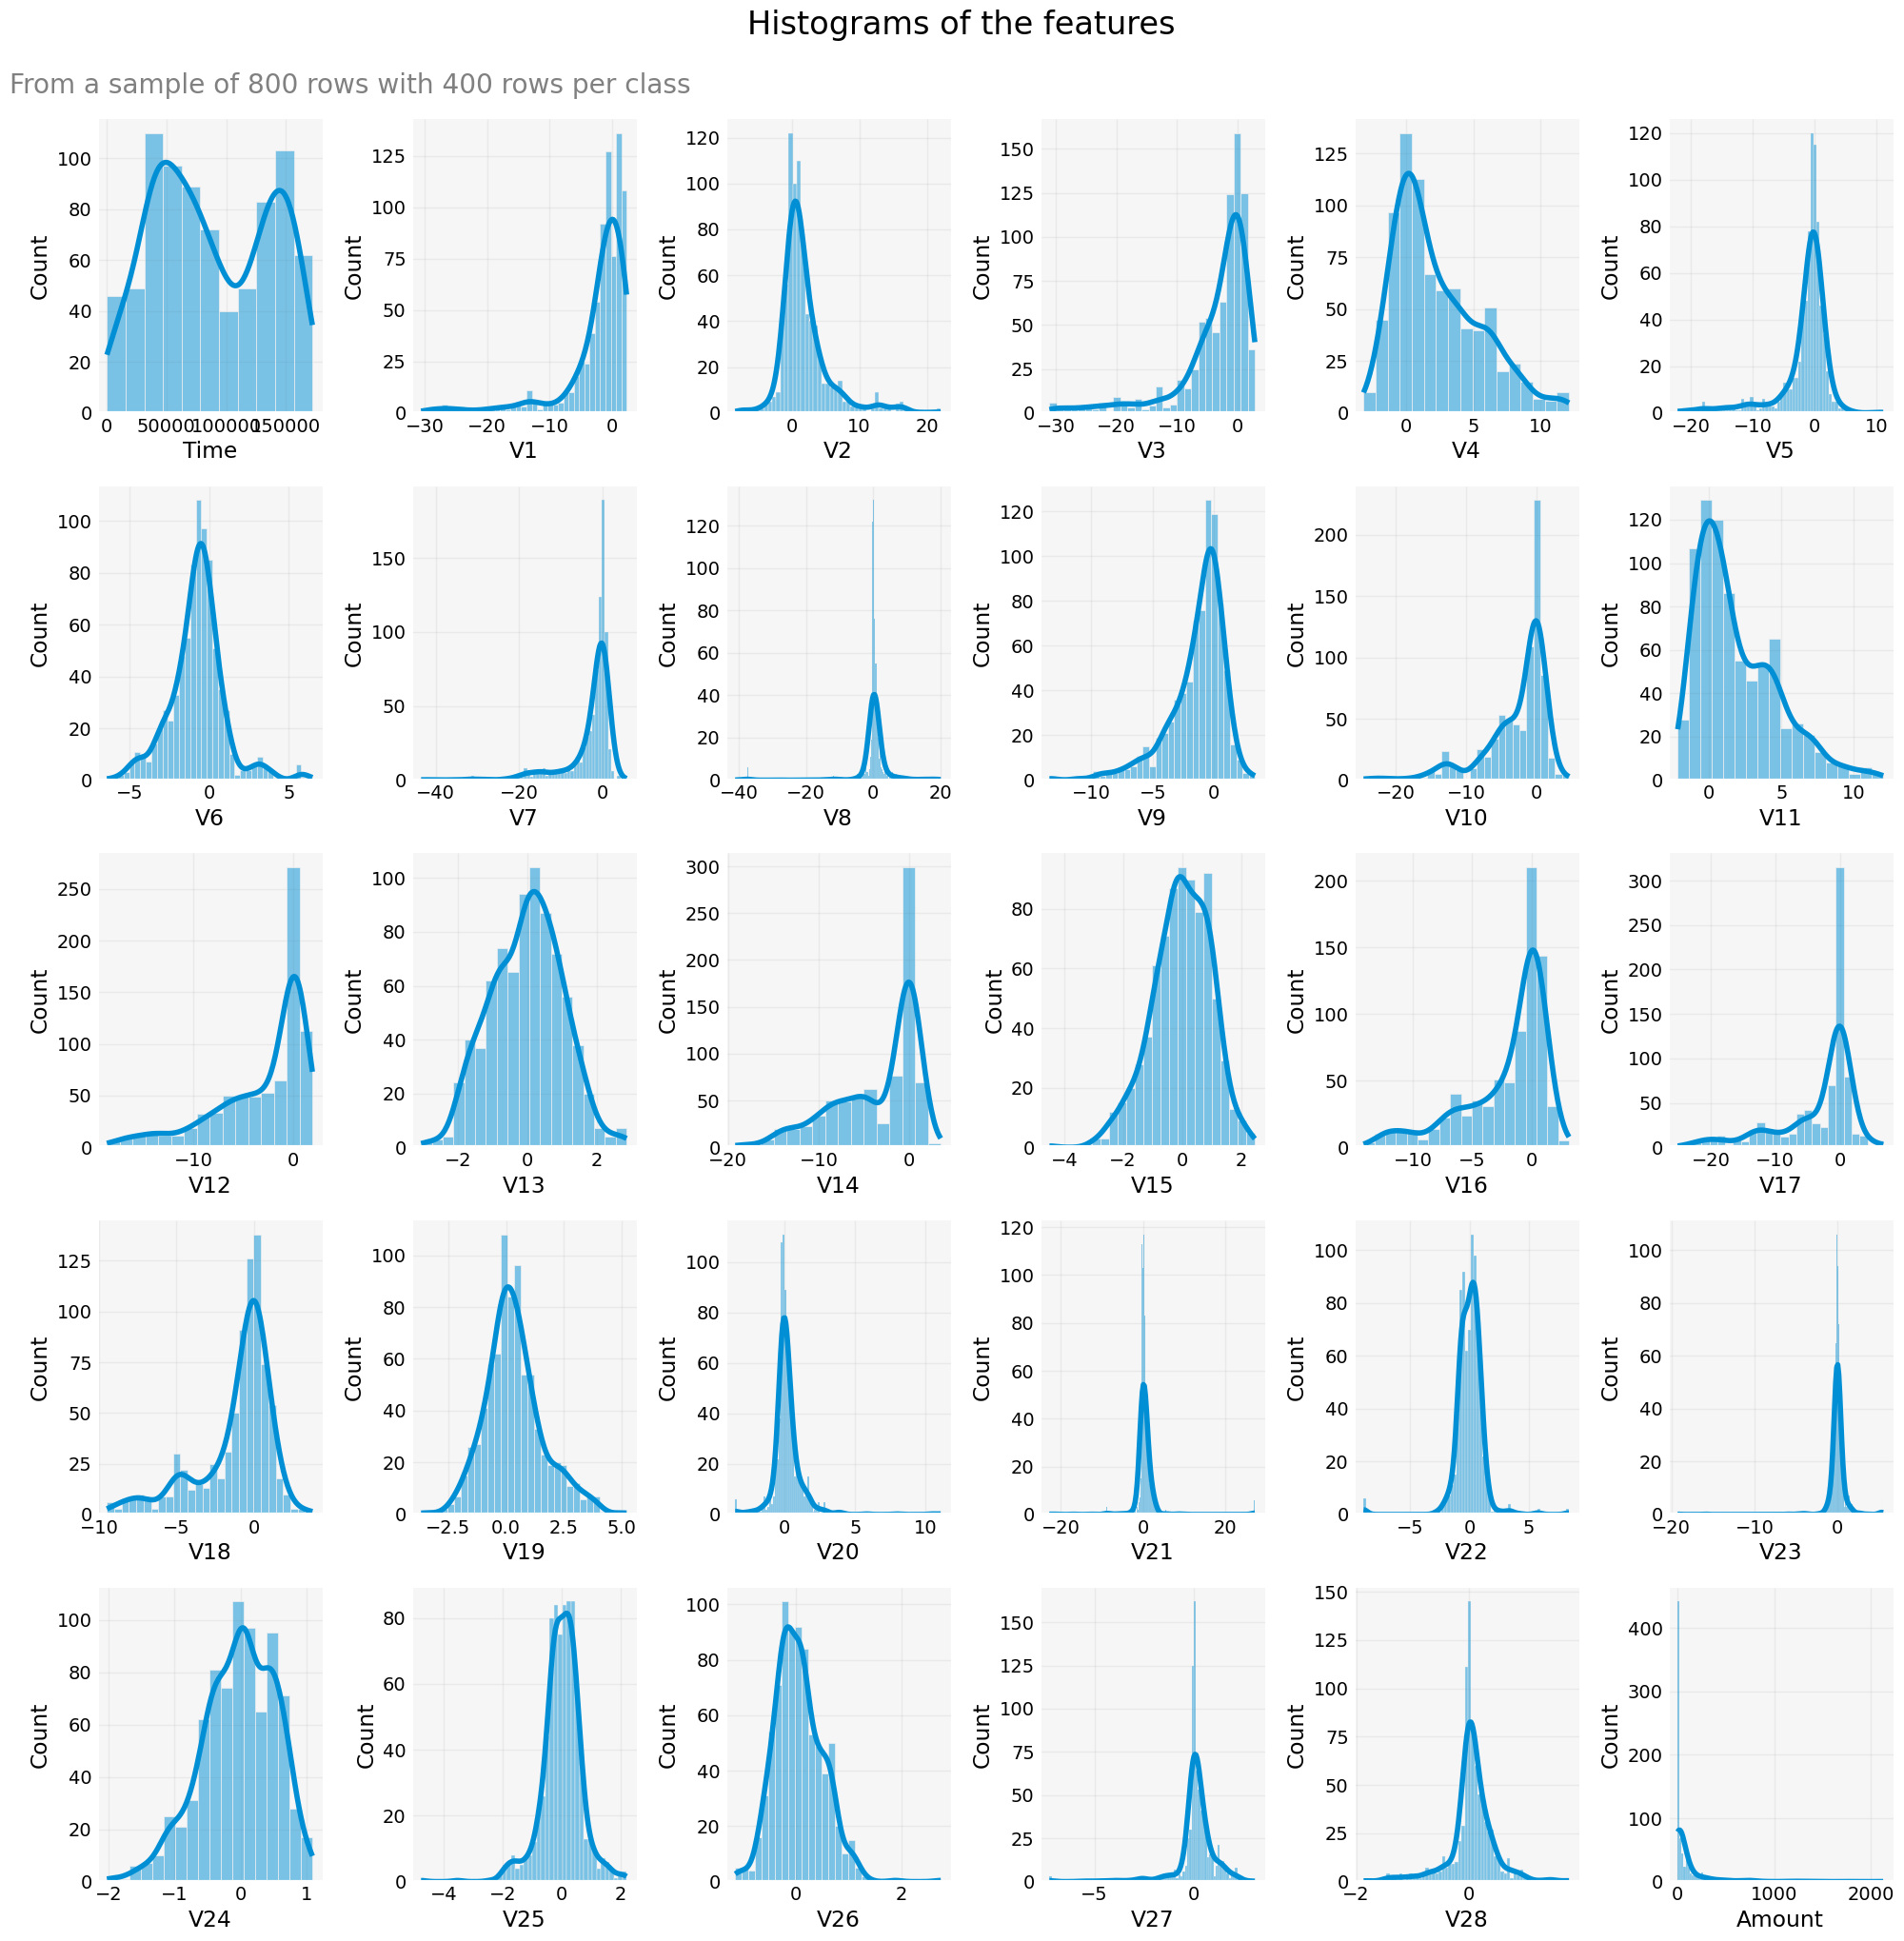

In [8]:
fig, axs = plt.subplots(
    *best_grid_shape(len(features)), figsize=(20, 20), tight_layout=True
)

for ax, feature in zip(axs.ravel(), features):
    h = sns.histplot(
        data=df_sample,
        x=feature,
        ax=ax,
        kde=True,
    )

fig.suptitle("Histograms of the features", y=1.02)

fig.text(
    0.0,
    0.98,
    f"From a sample of {df_sample.shape[0]} rows with 400 rows per class",
    ha="left",
    va="center",
    color="gray",
    fontsize="x-large"
)

plt.show()

We see that, even removing outliers in the last notebook, we still have skewed distributions for most of the features. We can plot again, this time considering the classes:

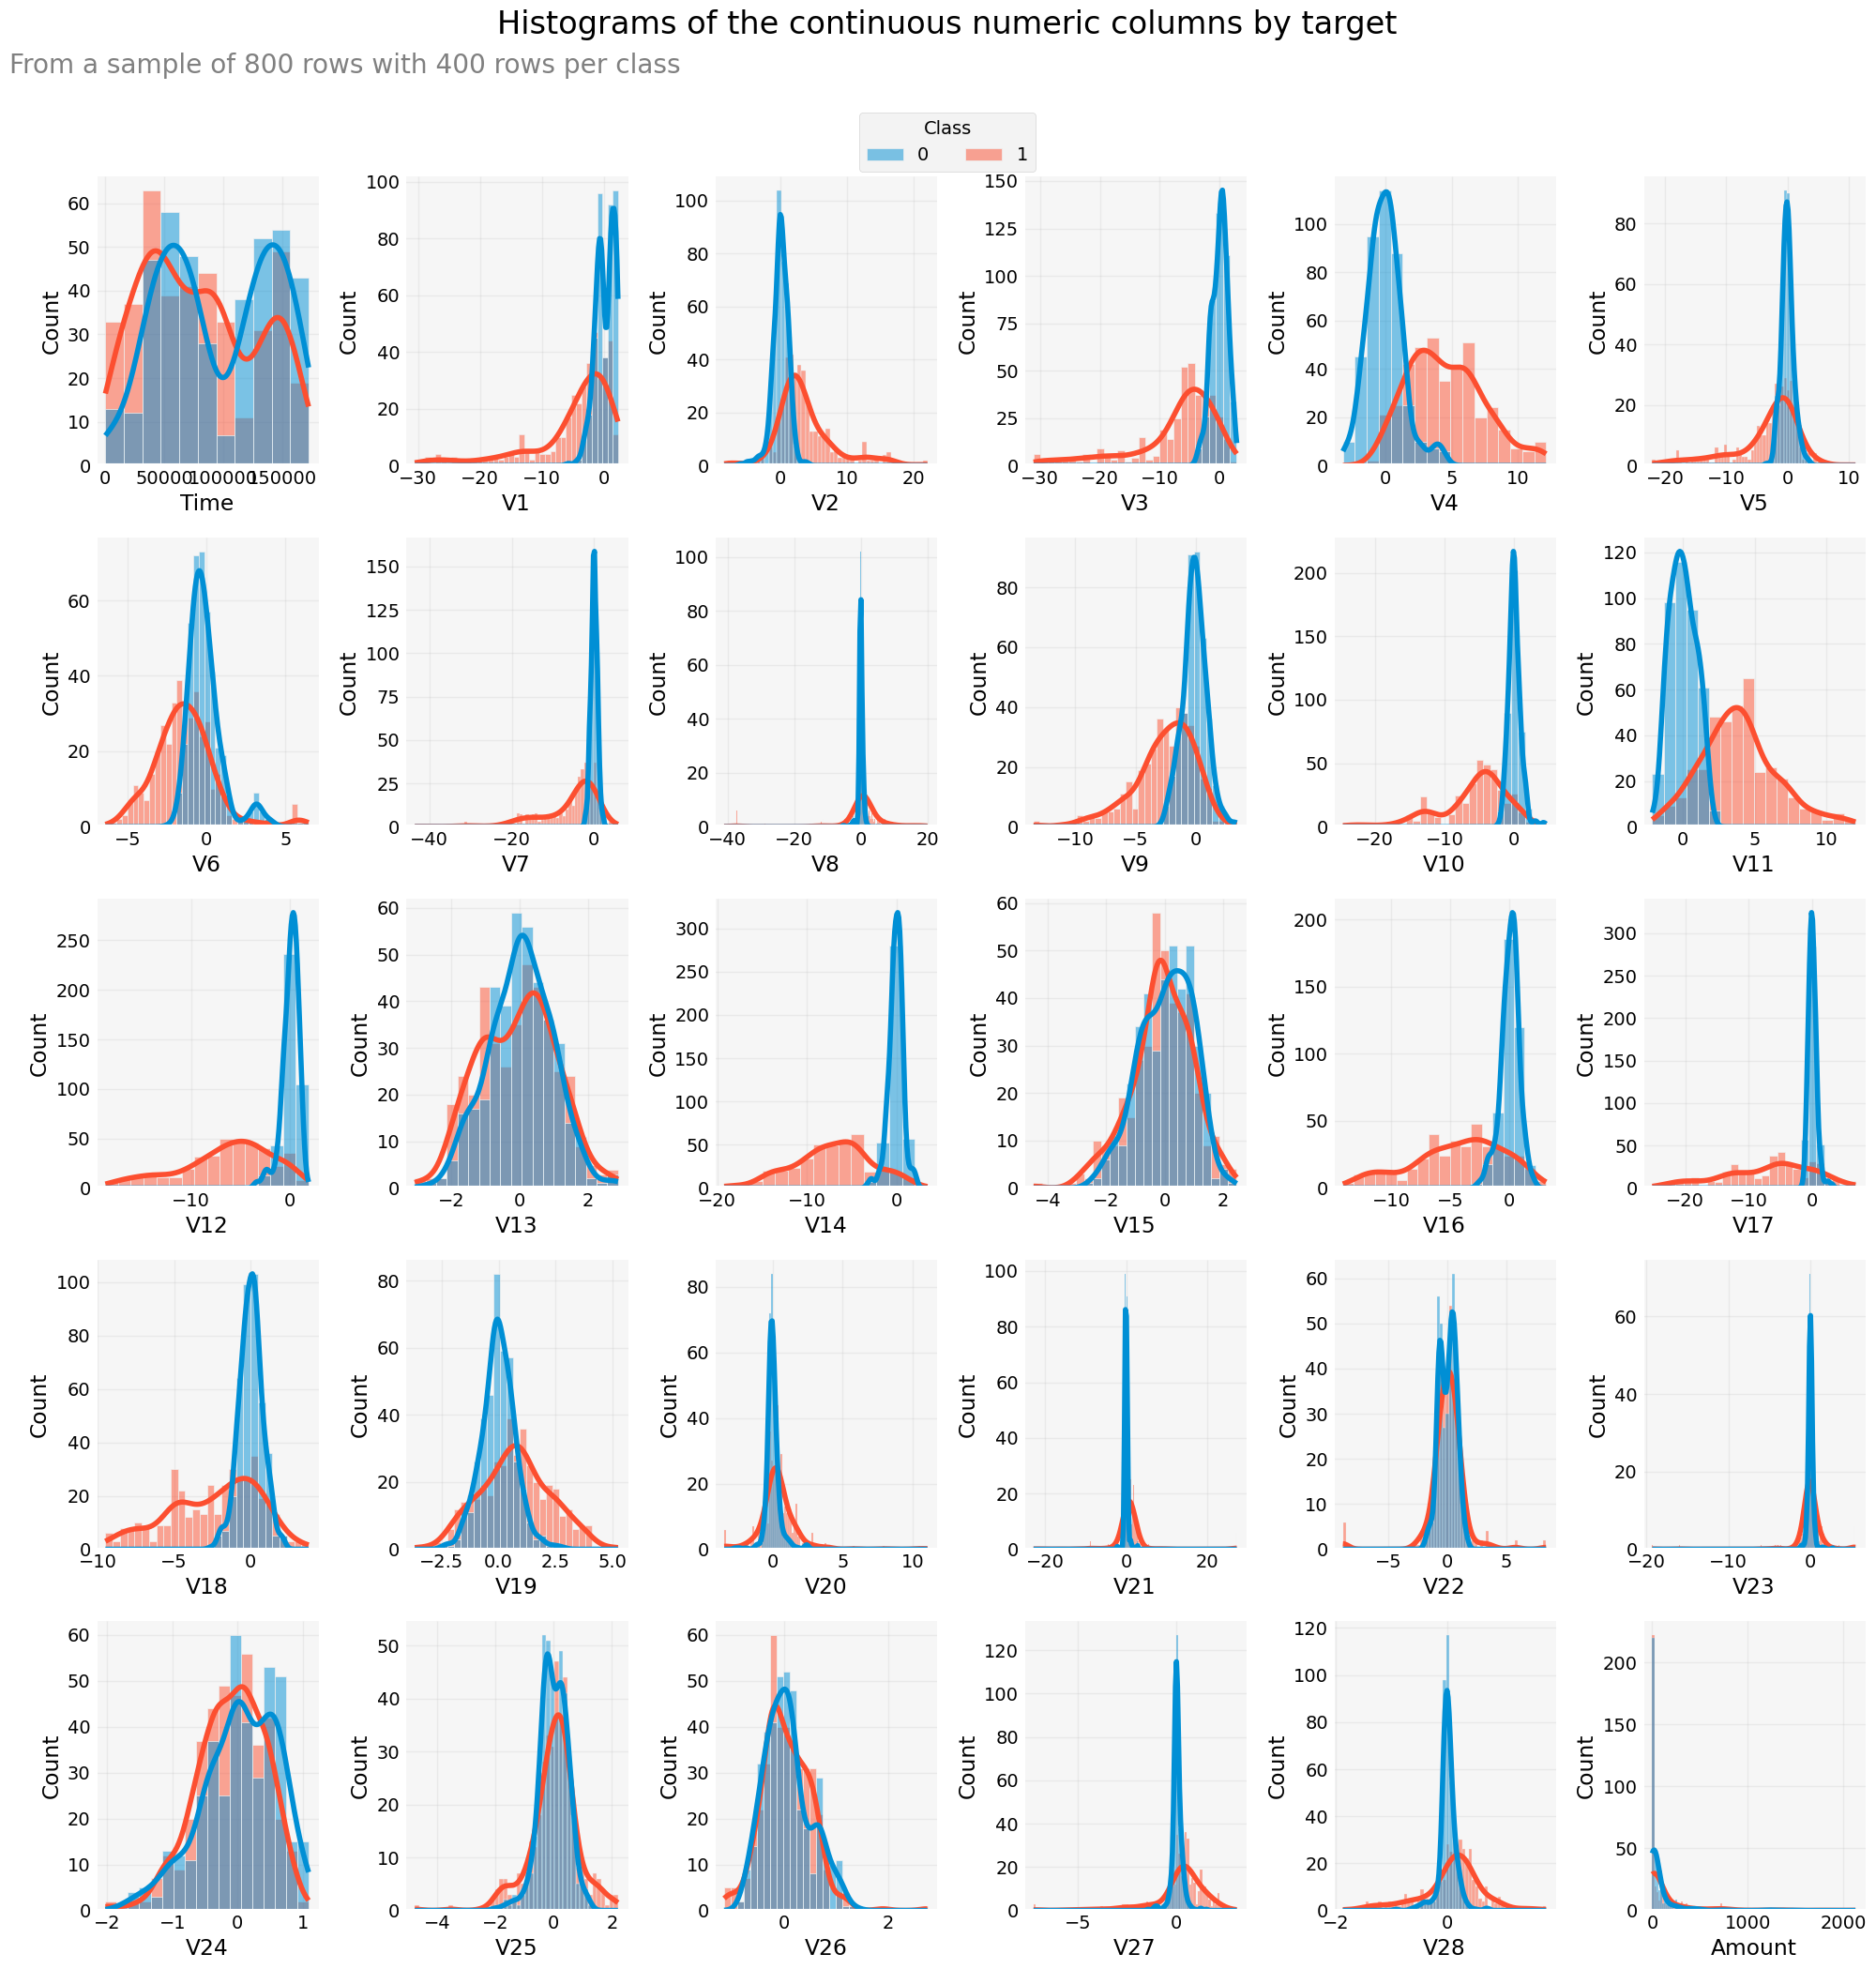

In [9]:
fig, axs = plt.subplots(
    *best_grid_shape(len(features)), figsize=(20, 20), tight_layout=True
)

for ax, feature in zip(axs.ravel(), features):
    h = sns.histplot(
        data=df_sample,
        x=feature,
        ax=ax,
        kde=True,
        hue=target,
    )
    legend = h.get_legend()
    if legend:
        legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(
    handles=legend.legend_handles,
    labels=labels,
    loc="upper center",
    ncols=df[target].nunique(),
    title="Class",
    bbox_to_anchor=(0.5, 1.0),
)
fig.suptitle("Histograms of the continuous numeric columns by target", y=1.05,)

fig.text(
    0.0,
    1.02,
    f"From a sample of {df_sample.shape[0]} rows with 400 rows per class",
    ha="left",
    va="center",
    color="gray",
    fontsize="x-large"
)

plt.show()

We see that some features, like *V14* and *V16* have a quite different distribution for each class. This is a good sign that they might be useful for a future model. And features like *V13* and *V15* have a similar distribution for both classes. This is a sign that they might not be useful for a future model.

Even though the plots show some differences between the classes, we need to perform some statistical tests to confirm if the differences are statistically significant. We will do that in the next section.

## Statistical tests

The class `StatisticalAnalysisBinary` was especially created to perform statistical tests for binary classification problems:

In [10]:
stats = StatisticalAnalysisBinary(df, target)

Let's begin by checking the normality and the shape of the distributions of the numerical features:

In [11]:
stats.kolmolgorov_smirnov(columns=features)

,column,statistic,p_value,normal
0,Time,0.103841,0.000000e+00,False
1,V1,0.130072,0.000000e+00,False
2,V2,0.053171,0.000000e+00,False
3,V3,0.045963,0.000000e+00,False
4,V4,0.043810,0.000000e+00,False
5,V5,0.051318,0.000000e+00,False
6,V6,0.133993,0.000000e+00,False
7,V7,0.042250,0.000000e+00,False
8,V8,0.167258,0.000000e+00,False
9,V9,0.030360,1.026283e-210,False


In [12]:
stats.shape_analysis(columns=features)

,column,skewness,skewness_classification,kurtosis,kurtosis_classification
0,Time,-0.014632,symmetric,-1.297215,platykurtic
1,V1,-1.320985,left-skewed,10.386000,leptokurtic
2,V2,-0.269613,left-skewed,7.977362,leptokurtic
3,V3,-1.720939,left-skewed,22.893561,leptokurtic
4,V4,0.582627,right-skewed,1.896302,leptokurtic
5,V5,-0.243764,left-skewed,11.098642,leptokurtic
6,V6,1.595440,right-skewed,3.080634,leptokurtic
7,V7,-4.001335,left-skewed,118.315855,leptokurtic
8,V8,-5.419585,left-skewed,259.665761,leptokurtic
9,V9,0.082291,right-skewed,1.540077,leptokurtic


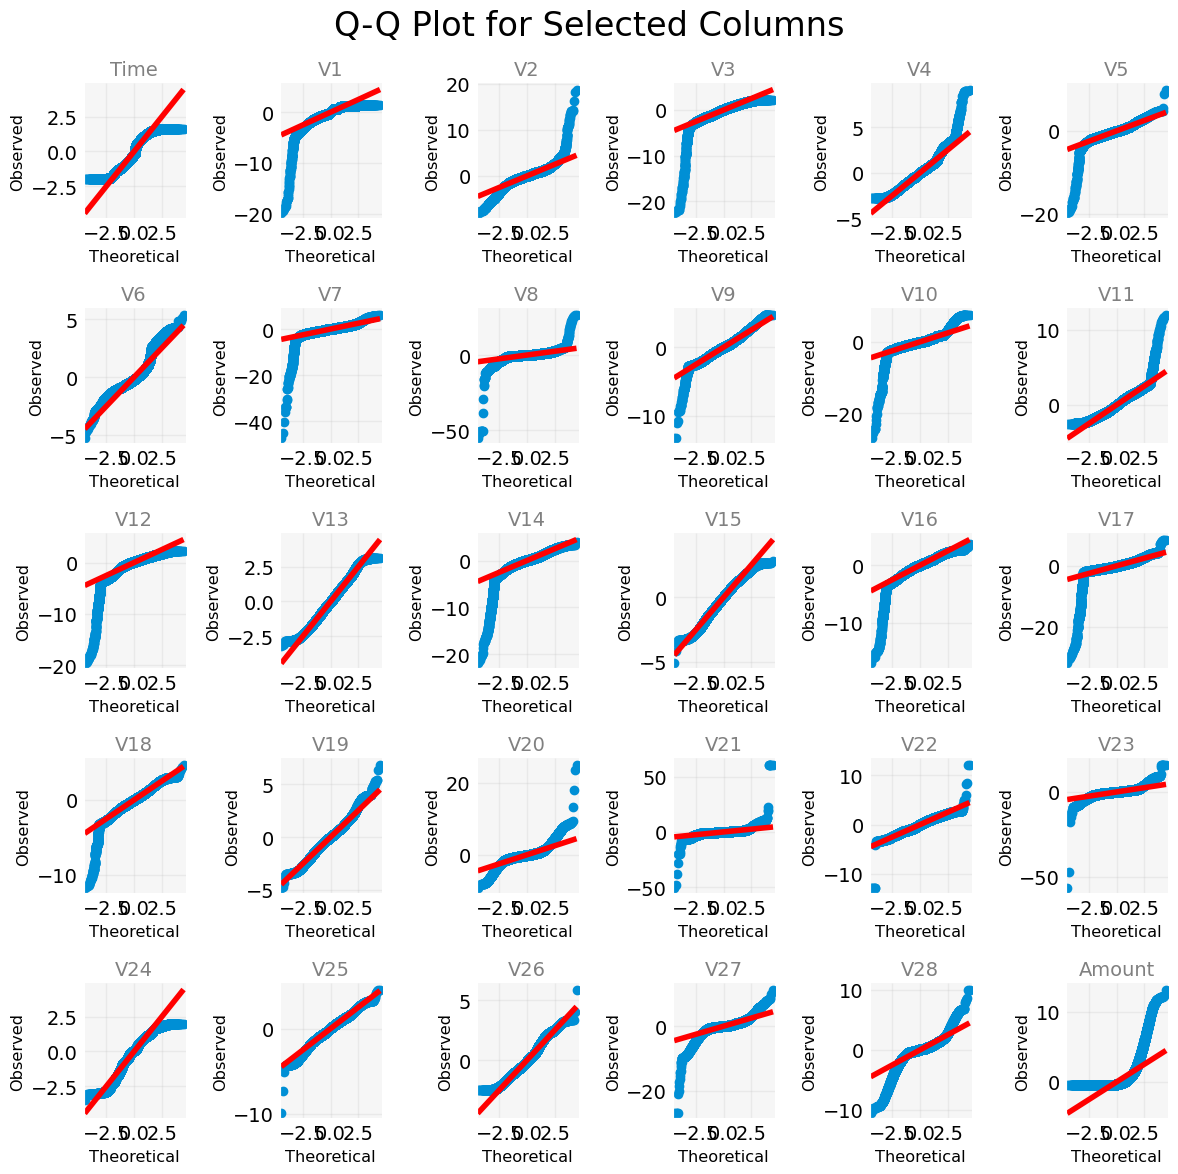

In [13]:
stats.plot_qqplot(columns=features)

None of the features have a normal distribution, and all of them have a skewed distribution. We can use the Mann-Whitney U test to check if the distributions of the features are significantly different for each class:

In [14]:
stats.mann_whitney(columns=features)

,column,statistic,p_value,different_distributions
0,Time,74811870.5,7.641280e-10,True
1,V1,104566927.0,7.052407e-126,True
2,V2,18074742.0,5.903742e-168,True
3,V3,118238750.0,9.636687e-225,True
4,V4,7513892.0,4.791904e-252,True
5,V5,91787609.0,1.969368e-59,True
6,V6,98830770.0,5.952111e-93,True
7,V7,108373812.0,1.606108e-150,True
8,V8,44026163.0,4.262224e-34,True
9,V9,108959452.0,1.648869e-154,True


In [15]:
stats.mann_whitney(columns=features).query(
    "different_distributions == False"
)

,column,statistic,p_value,different_distributions
13,V13,67418435.0,0.079953,False
15,V15,67240670.0,0.099942,False
22,V22,62312201.0,0.197488,False


These 3 features have a p-value higher than 0.05, which means that we cannot reject the null hypothesis that the distributions are the same for both classes. This means that these features might not be useful for a future model. Let's drop them from the dataset.

In [16]:
columns_to_drop = stats.mann_whitney(columns=features).query(
    "different_distributions == False"
)["column"].tolist()

columns_to_drop

['V13', 'V15', 'V22']

In [17]:
df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262594 entries, 0 to 262593
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    262594 non-null  float64
 1   V1      262594 non-null  float64
 2   V2      262594 non-null  float64
 3   V3      262594 non-null  float64
 4   V4      262594 non-null  float64
 5   V5      262594 non-null  float64
 6   V6      262594 non-null  float64
 7   V7      262594 non-null  float64
 8   V8      262594 non-null  float64
 9   V9      262594 non-null  float64
 10  V10     262594 non-null  float64
 11  V11     262594 non-null  float64
 12  V12     262594 non-null  float64
 13  V14     262594 non-null  float64
 14  V16     262594 non-null  float64
 15  V17     262594 non-null  float64
 16  V18     262594 non-null  float64
 17  V19     262594 non-null  float64
 18  V20     262594 non-null  float64
 19  V21     262594 non-null  float64
 20  V23     262594 non-null  float64
 21  V24     26

## Export the data

We can now export the data to be used in the next notebook.

In [18]:
df.to_parquet(PROCESSED_DATA_FILE, index=False, engine="fastparquet")